In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up some plotting settings
fs = 14
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'legend.fontsize': fs,
                     'axes.labelsize': fs,
                     'axes.titlesize': fs,
                     'xtick.labelsize': fs,
                     'ytick.labelsize': fs})
plt.rcParams["figure.figsize"] = (9,7)

plt_colors = ['k',
              '#1b9e77',
              '#d95f02',
              '#7570b3',
              '#e7298a',
              '#66a61e',
              '#e6ab02',
              '#a6761d',
              '#666666']

In [3]:
infile = "ExamplesAndTests_Wimp_reach.params_reach_WIMP_test"

In [4]:
# Load reach_WIMP and run infile
import sys
sys.path.append("../")
sys.argv[1] = infile
from WIMP_reach import *

#----------------------------------
Sucessfully imported parameters

Results will be stored in: 
out_reach_WIMP_test_Gypsum_*.txt

#----------------------------------

age of the target sample [Myr]:  1000.0
mass of the target sample in [kg]:  1e-05
track length resolution in [Å]:  10.0
uranium-238 concentration in [g/g]:  1e-11
target mineral:  Gypsum
including H tracks?:  False

#----------------------------------

including external constraint on sample age?  True
relative uncertainty:  0.05
including external constraint on sample mass?  True
relative uncertainty:  1e-05
including external constraint on solar nu flux?  True
relative uncertainty:  1.0
including external constraint on GSNB normalization?  True
relative uncertainty:  1.0
including external constraint on DSNB normalization?  True
relative uncertainty:  1.0
including external constraint on atmospheric nu flux?  True
relative uncertainty:  1.0
including external constraint on uranium-238 concentration?  True
relative unce

In [5]:
# CHECK SETTINGS

In [6]:
TS_threshold_exclusion, CL_discovery, TS_threshold_discovery 

(2.705543454095404, 0.9999994266968563, 25.00000000007513)

In [7]:
use_minimizer_minuit, use_minimizer_powell

(True, False)

In [8]:
fin_params

'ExamplesAndTests_Wimp_reach.params_reach_WIMP_test'

In [9]:
ext_bools

array([ True,  True,  True,  True,  True,  True,  True])

In [10]:
ext_unc

array([5.e-02, 1.e-05, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e-01])

In [11]:
incl_bkg_bools

array([ True,  True,  True,  True,  True,  True])

In [12]:
run_params.mineral_name

'Gypsum'

In [13]:
# CHECK THE SPECTRA

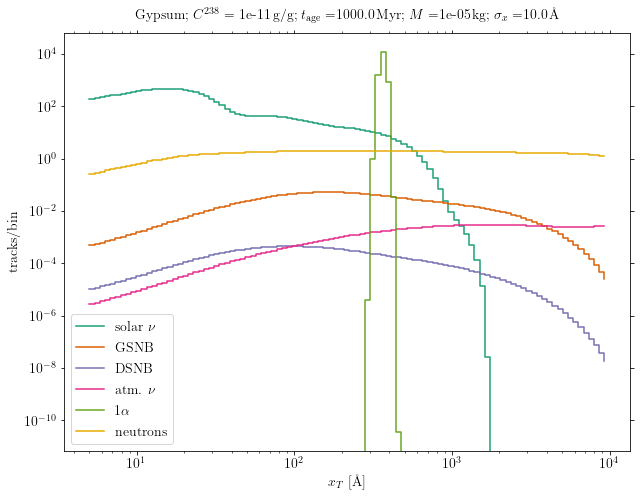

In [14]:
# plot background spectra
bin_edges = CalcSpectra.smear_and_bin(
        Spec_calculator.calc_dRdx_BkgNeu_solar(),
        run_params.readout_resolution_Aa,
        xmin = run_params.TR_xmin_Aa,
        xmax = run_params.TR_xmax_Aa,
        nbins = int(run_params.TR_nbins),
        logbins = run_params.TR_logbins
        )[0]

plt.close('all')
plt.step(bin_edges[:-1], Spec_nu_solar, where='post', color=plt_colors[1], label=r'solar $\nu$')
plt.step(bin_edges[:-1], Spec_nu_GSNB, where='post', color=plt_colors[2], label=r'GSNB')
plt.step(bin_edges[:-1], Spec_nu_DSNB, where='post', color=plt_colors[3], label=r'DSNB')
plt.step(bin_edges[:-1], Spec_nu_atm, where='post', color=plt_colors[4], label=r'atm. $\nu$')
plt.step(bin_edges[:-1], Spec_rad_1a, where='post', color=plt_colors[5], label=r'1$\alpha$')
plt.step(bin_edges[:-1], Spec_rad_neutrons, where='post', color=plt_colors[6], label=r'neutrons')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

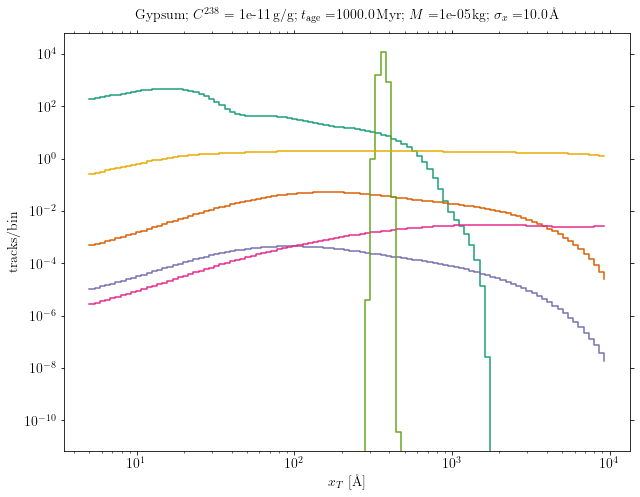

In [15]:
# same plot using Spec_bkgs list
plt.close('all')
for ind, bkg in enumerate(Spec_bkgs):
    plt.step(bin_edges[:-1], bkg, where='post', color=plt_colors[ind+1])

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
#plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()
    

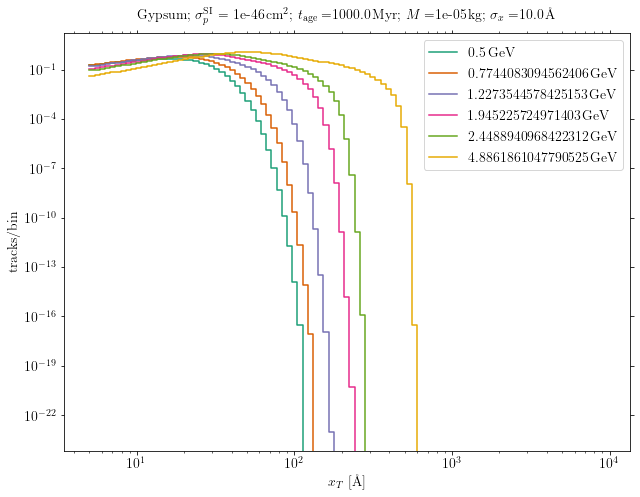

In [16]:
# plot some DM spectra
plt.close('all')
for color_ind, mass_ind in enumerate([0, 19, 39, 59, 69, 99]):
    plt.step(bin_edges[:-1], run_params.sample_age_Myr * run_params.sample_mass_kg * get_DM_spec(mass_ind), where='post', color=plt_colors[color_ind+1], label=str(DM_masses[mass_ind])+r'\,GeV')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $\sigma_p^{\rm SI}$ = '+str(ref_xsec)+r'\,cm$^2$'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

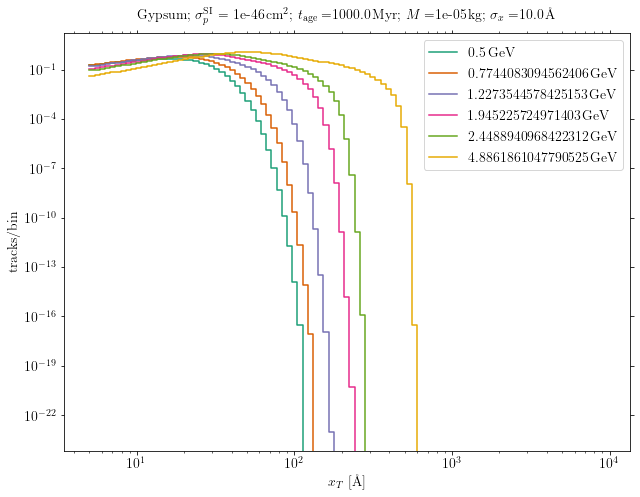

In [17]:
# make the same plot but with the Spec_DM output
plt.close('all')
for color_ind, mass_ind in enumerate([0, 19, 39, 59, 69, 99]):
    plt.step(bin_edges[:-1], Spec_DM[mass_ind], where='post', color=plt_colors[color_ind+1], label=str(DM_masses[mass_ind])+r'\,GeV')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $\sigma_p^{\rm SI}$ = '+str(ref_xsec)+r'\,cm$^2$'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

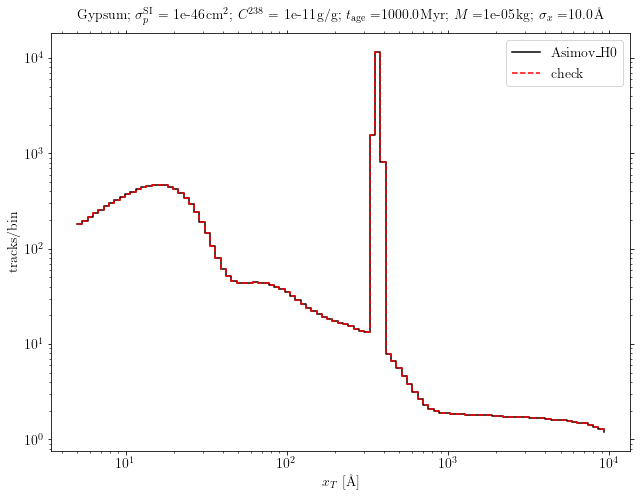

In [18]:
# plot asimov data for H0
spec_H0 = np.zeros(Spec_nu_solar.shape)
for i in range(len(Spec_bkgs)):
    if incl_bkg_bools[i]:
        spec_H0 += Spec_bkgs[i]

plt.close('all')
plt.step(bin_edges[:-1], calc_asimov_H0(), where='post', color='k', linestyle='-', label=r'Asimov\_H0')
plt.step(bin_edges[:-1], spec_H0, where='post', color='r', linestyle='--', label='check')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $\sigma_p^{\rm SI}$ = '+str(ref_xsec)+r'\,cm$^2$'
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

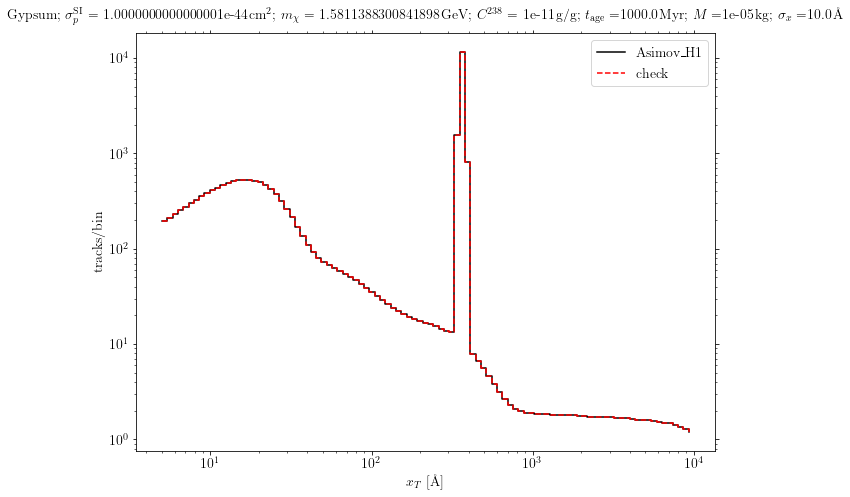

In [19]:
# plot asimov data for H1
mass_ind = 50
xsec_rel = 1e2

spec_H1 = spec_H0 + xsec_rel * run_params.sample_age_Myr * run_params.sample_mass_kg * get_DM_spec(mass_ind)

plt.close('all')
plt.step(bin_edges[:-1], calc_asimov_H1(mass_ind, xsec_rel), where='post', color='k', linestyle='-', label=r'Asimov\_H1')
plt.step(bin_edges[:-1], spec_H1, where='post', color='r', linestyle='--', label='check')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $\sigma_p^{\rm SI}$ = '+str(xsec_rel*ref_xsec)+r'\,cm$^2$'
          + r'; $m_\chi$ = '+str(DM_masses[mass_ind])+r'\,GeV'
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

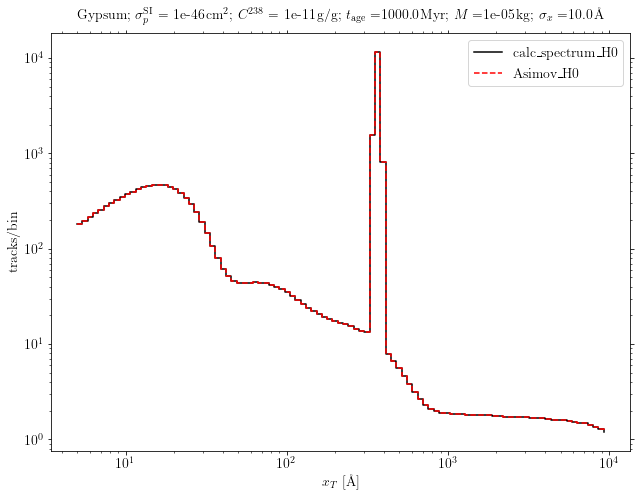

In [20]:
# check the calc_spectrum_H0 function:

theta_nuisance = np.ones(N_thetas)
#theta_nuisance = [1., 1., 1., 1., 1., 1., 1.]

plt.close('all')
plt.step(bin_edges[:-1], calc_spectrum_H0(theta_nuisance), where='post', color='k', linestyle='-', label=r'calc\_spectrum\_H0')
plt.step(bin_edges[:-1], calc_asimov_H0(), where='post', color='r', linestyle='--', label=r'Asimov\_H0')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$x_T$ [\AA]')
plt.ylabel(r'tracks/bin')
plt.legend()
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $\sigma_p^{\rm SI}$ = '+str(ref_xsec)+r'\,cm$^2$'
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

In [21]:
# CHECK THAT THE TEST STATISTICS BEHAVES REASONABLY

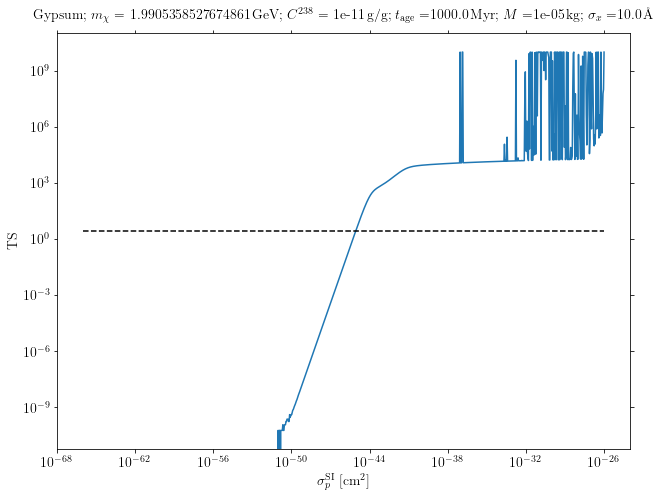

In [22]:
# check the Test Statistics for exclusion
mass_ind = 60
xsecs_rel = np.logspace(-20,20,1000)
plt.plot(xsecs_rel*ref_xsec, [TS_func_exclusion(mass_ind, xs) for xs in xsecs_rel])
plt.plot(np.array([xsecs_rel[0],xsecs_rel[-1]])*ref_xsec, np.array([TS_threshold_exclusion,TS_threshold_exclusion]), color='k', linestyle='--')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$\sigma_p^{\rm SI}$ [cm$^2$]')
plt.ylabel(r'TS')
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'; $m_\chi$ = '+str(DM_masses[mass_ind])+r'\,GeV'
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

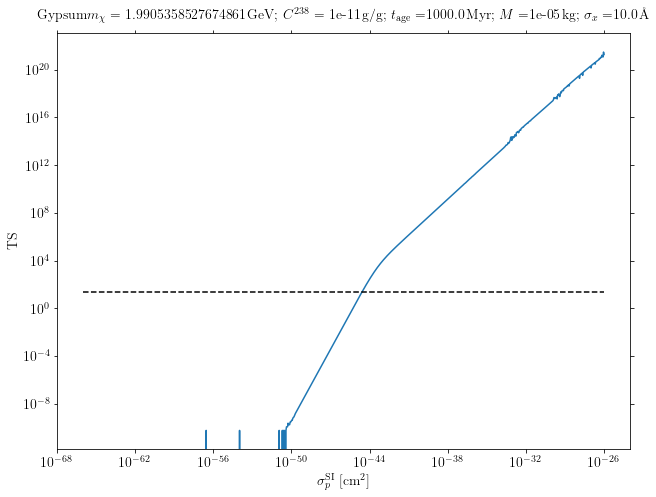

In [23]:
# check the Test Statistics for discovery
mass_ind = 60
xsecs_rel = np.logspace(-20,20,1000)
plt.plot(xsecs_rel*ref_xsec, [TS_func_discovery(mass_ind, xs) for xs in xsecs_rel])
plt.plot(np.array([xsecs_rel[0],xsecs_rel[-1]])*ref_xsec, np.array([TS_threshold_discovery,TS_threshold_discovery]), color='k', linestyle='--')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$\sigma_p^{\rm SI}$ [cm$^2$]')
plt.ylabel(r'TS')
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.title(run_params.mineral_name
          + r'$m_\chi$ = '+str(DM_masses[mass_ind])+r'\,GeV'
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()

In [24]:
# PLOT RESULT OF THE TEST RUN

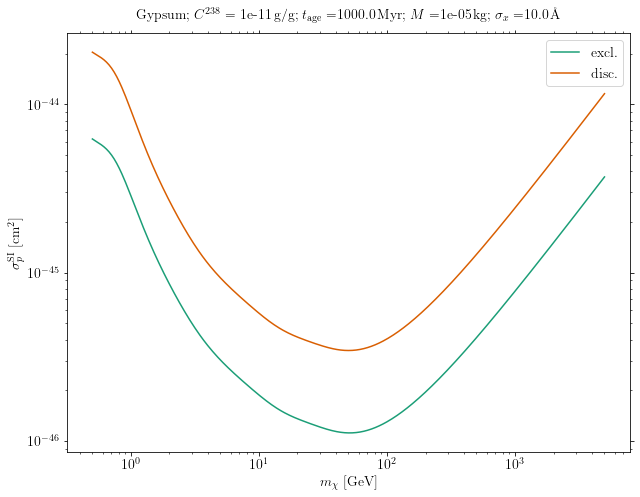

In [25]:
# plot exclusion and discovery reach
res_excl = np.loadtxt('out_reach_WIMP_test_Gypsum_exclusion.txt')
res_disc = np.loadtxt('out_reach_WIMP_test_Gypsum_discovery.txt')

plt.close('all')
plt.plot(res_excl[:,0], res_excl[:,1], color=plt_colors[1], label=r'excl.')
plt.plot(res_disc[:,0], res_disc[:,1], color=plt_colors[2], label=r'disc.')

plt.xscale('log')
plt.yscale('log')
#plt.xlim()
#plt.ylim()
plt.xlabel(r'$m_\chi$ [GeV]')
plt.ylabel(r'$\sigma_p^{\rm SI}$ [cm$^2$]')
plt.tick_params(right=True,top=True)
plt.tick_params(which='minor',right=True,top=True)
plt.legend()
plt.title(run_params.mineral_name
          + r'; $C^{238}$ = '+str(run_params.C238)+r'\,g/g'
          + r'; $t_{\rm age} = $'+str(run_params.sample_age_Myr)+r'\,Myr'
          + r'; $M = $'+str(run_params.sample_mass_kg)+r'\,kg'
          + r'; $\sigma_x = $'+str(run_params.readout_resolution_Aa)+r'\,\AA',
          y = 1.02
        )
plt.tight_layout()
plt.show()